### The purpose of this notebook is to create the full automatic time series prediction by taking into account also the timing analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

/opt/conda/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
## function to fomat the data
def data_format(df):
    df=df.drop(['Unnamed: 0','campaign_name', 'adset_name', 'ad_name','inline_link_click_ctr', 'inline_post_engagement',
       'instant_experience_clicks_to_open',
       'instant_experience_clicks_to_start',
       'instant_experience_outbound_clicks', 'interactive_component_tap_value',
       'objective','updated_time','website_ctr_link_click'],axis=1)
    df=df.rename(columns={'cost_per_action_type_video_view':'cpa_video_view'})
    df=df.rename(columns={'cost_per_action_type_link_click':'cpa_link_click'})
    df=df.rename(columns={'cost_per_action_type_onsite_conversion.post_save':'cpa_on_conv'})
    df=df.rename(columns={'cost_per_action_type_omni_activate_app':'cpa_all_act_app'})
    df=df.rename(columns={'cost_per_action_type_post_engagement':'cpa_post_eng'})
    df=df.rename(columns={'cost_per_action_type_page_engagement':'cpa_pg_eng'})
    df=df.rename(columns={'cost_per_action_type_omni_app_install':'cpa_all_app_install'})
    df=df.rename(columns={'cost_per_inline_link_click':'cpinl_link_click'})
    df=df.rename(columns={'cost_per_inline_post_engagement':'cpinl_post_eng'})
    df=df.rename(columns={'cost_per_outbound_click_outbound_click':'cpo_click'})
    df=df.rename(columns={'hourly_stats_aggregated_by_advertiser_time_zone':'time'})
    df=df.rename(columns={'actions_mobile_app_install':'mobile_conv'})
    df=df.rename(columns={'actions_omni_app_install':'all_conv'})
    df['CR']=round((df.mobile_conv/df.clicks) *100, 2)
    df['CTR']=round((df.clicks / df.impressions) * 100,4)
    df['CPC']= round(df.spend / df.clicks,2)
    df['costPerCon'] = round(df.spend / df.mobile_conv, 2)
    df['CPM'] = round((df.spend / df.impressions) * 1000, 2)

    df=df.dropna(subset=['time'])
    df.time=df.time.replace('00:00:00 - 00:59:59',1)
    df.time=df.time.replace('01:00:00 - 01:59:59',2)
    df.time=df.time.replace('02:00:00 - 02:59:59',3)
    df.time=df.time.replace('03:00:00 - 03:59:59',4)
    df.time=df.time.replace('04:00:00 - 04:59:59',5)
    df.time=df.time.replace('05:00:00 - 05:59:59',6)
    df.time=df.time.replace('06:00:00 - 06:59:59',7)
    df.time=df.time.replace('07:00:00 - 07:59:59',8)
    df.time=df.time.replace('08:00:00 - 08:59:59',9)
    df.time=df.time.replace('09:00:00 - 09:59:59',10)
    df.time=df.time.replace('10:00:00 - 10:59:59',11)
    df.time=df.time.replace('11:00:00 - 11:59:59',12)
    df.time=df.time.replace('12:00:00 - 12:59:59',13)
    df.time=df.time.replace('13:00:00 - 13:59:59',14)
    df.time=df.time.replace('14:00:00 - 14:59:59',15)
    df.time=df.time.replace('15:00:00 - 15:59:59',16)
    df.time=df.time.replace('16:00:00 - 16:59:59',17)
    df.time=df.time.replace('17:00:00 - 17:59:59',18)
    df.time=df.time.replace('18:00:00 - 18:59:59',19)
    df.time=df.time.replace('19:00:00 - 19:59:59',20)
    df.time=df.time.replace('20:00:00 - 20:59:59',21)
    df.time=df.time.replace('21:00:00 - 21:59:59',22)
    df.time=df.time.replace('22:00:00 - 22:59:59',23)
    df.time=df.time.replace('23:00:00 - 23:59:59',24)
    df['day']=pd.to_datetime(df['date_start']).dt.day
    df['Time']=df['time']#+24*(df['day']-1)
    df['week']=pd.to_datetime(df['date_start']).dt.week
    df.drop(df.tail(1).index,inplace = True)
    return df

In [3]:
df.campaign_id.unique()

NameError: name 'df' is not defined

In [4]:
def timing_analysis(df):
    grouped = pd.DataFrame(df.groupby(['Time','week'])['mobile_conv'].sum().reset_index())
    plot = sns.lineplot(x='Time', y='mobile_conv', data=grouped)
    return plot, grouped

In [38]:
file='../Timing Analysis/data/ad_Aug_hourly_advertiser_time.csv'
df1=pd.read_csv(file)
df1=data_format(df1)
df1.campaign_id.unique()

array([23845309179470180, 23845314022210180, 23845314118080180,
       23845399708880180, 23845411159500180, 23845456288210180,
       23845468874450180, 23845481811500180, 23845502516410180,
       23845475824840180, 23845339146020180])

In [39]:
df2=pd.read_csv('ad_Sep_hourly_advertiser_time.csv')
df2=data_format(df2)
frames = [df1, df2]

df = pd.concat(frames)
df2.campaign_id.unique()

array([23845481811500180, 23845578892300180, 23845580845570180,
       23845629612600180, 23845646017730180, 23845686019710180,
       23845617952880180, 23845669670640180, 23845669670630180,
       23845669562260180, 23845569274160180, 23845719266040180])

In [41]:
import numpy as np
#df['pricesMatch?'] = np.where(df['campaign_id'] == df2['campaign_id'])
set(df1['campaign_id']).intersection(df2['campaign_id'])

{23845481811500180}

In [35]:
df1=df.loc[(df.campaign_id==23845309179470180)]
df2=df.loc[(df.campaign_id==23845314022210180)]
df3=df.loc[(df.campaign_id==23845314118080180)]
df4=df.loc[(df.campaign_id==23845399708880180)]
df5=df.loc[(df.campaign_id==23845411159500180)]
df6=df.loc[(df.campaign_id==23845456288210180)]
df7=df.loc[(df.campaign_id==23845468874450180)]
df8=df.loc[(df.campaign_id==23845481811500180)]
df9=df.loc[(df.campaign_id==23845502516410180)]
df10=df.loc[(df.campaign_id==23845475824840180)]
df11=df.loc[(df.campaign_id==23845339146020180)]

## Campaign 1

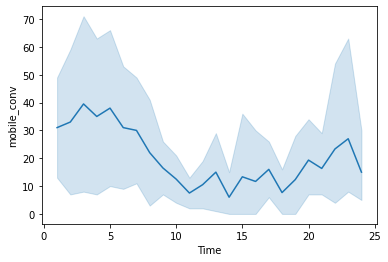

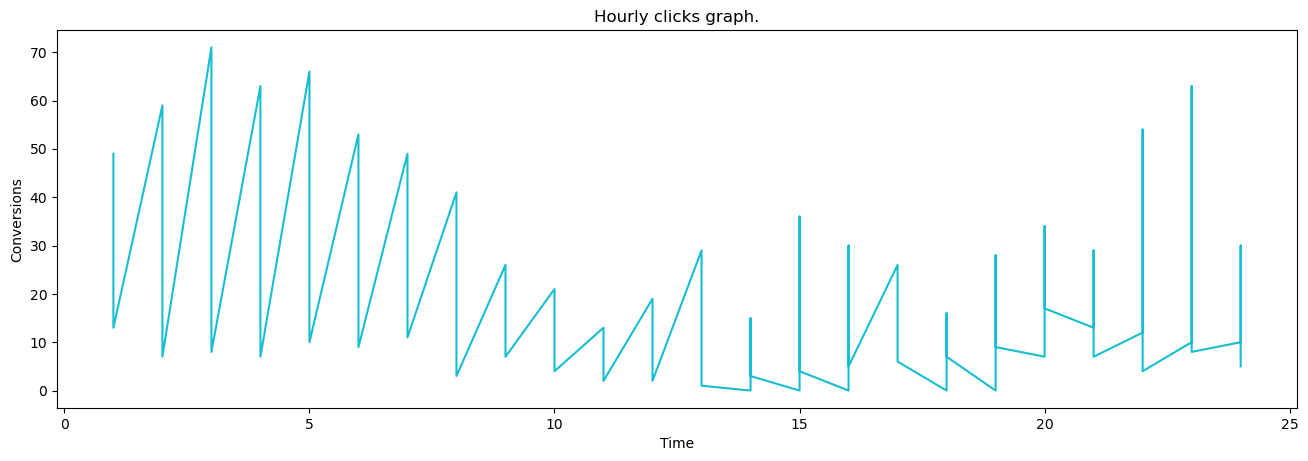

NameError: name 'model_fit' is not defined

In [42]:
plot,grouped1=timing_analysis(df5)
def plot_df(df5, x, y, title="", xlabel='Time', ylabel='Conversions', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:cyan')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(grouped1, x=grouped1.Time, y=grouped1.mobile_conv, title='Hourly clicks graph.')  
model_fit.plot_predict(dynamic=False)
plt.show()

In [43]:
grouped1

,Time,week,mobile_conv
0,1,34,49.0
1,1,35,13.0
2,2,34,59.0
3,2,35,7.0
4,3,34,71.0
5,3,35,8.0
6,4,34,63.0
7,4,35,7.0
8,5,34,66.0
9,5,35,10.0


In [44]:
from statsmodels.tsa.stattools import acf
#grouped1=pd.DataFrame(df1.groupby(['Time','week'])['mobile_conv'].sum().reset_index())
#We need to split the data in train and test samples where we use the test sample to check the forecasting
# Create Training and Test
train = grouped1.mobile_conv[:80]
test = grouped1.mobile_conv[80:]
# Build Model
model = ARIMA(train, order=(10, 2, 0)) 

fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(16, alpha=0)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals: Campaign 1')
plt.legend(loc='upper left', fontsize=8)
plt.show()


NameError: name 'ARIMA' is not defined

## Campaign 2

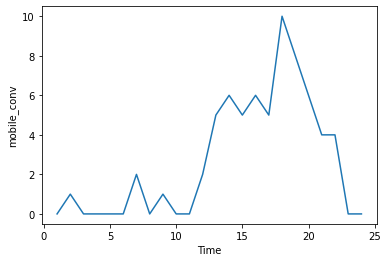

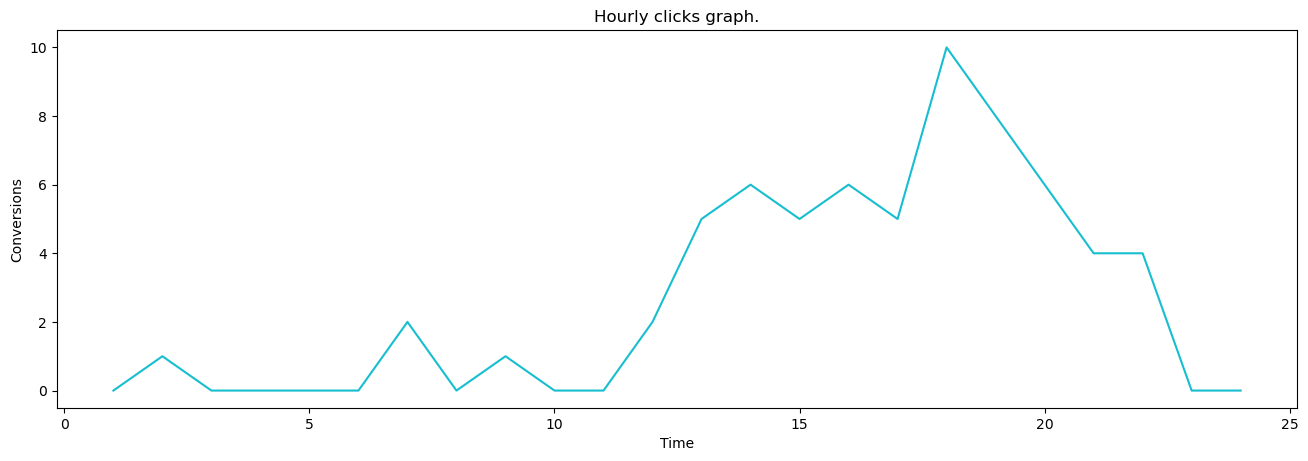

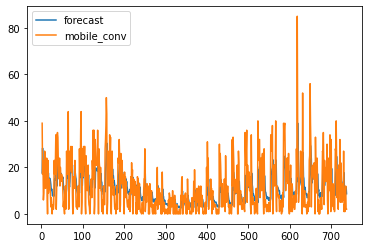

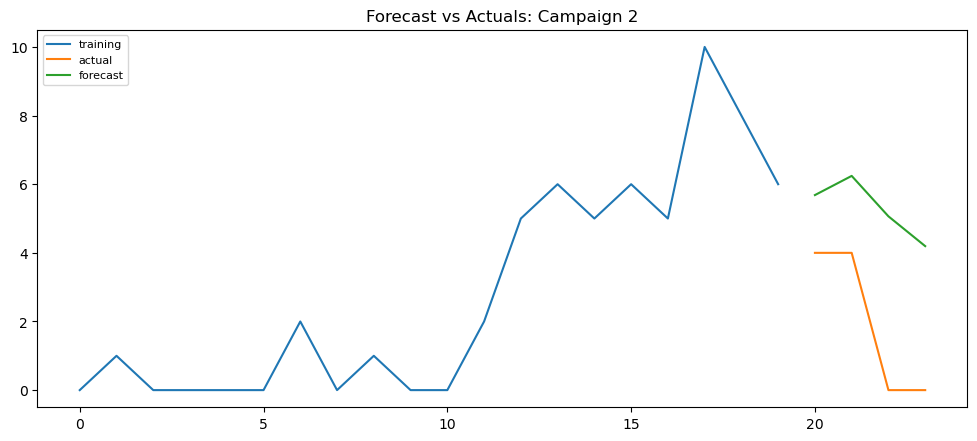

In [34]:
plot,grouped2=timing_analysis(df2)
plot_df(grouped2, x=grouped2.Time, y=grouped2.mobile_conv, title='Hourly clicks graph.')  
model_fit.plot_predict(dynamic=False)
plt.show()

train = grouped2.mobile_conv[:20]
test = grouped2.mobile_conv[20:]
# Build Model
model = ARIMA(train, order=(3, 2, 0)) 

fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(4, alpha=0)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals: Campaign 2')
plt.legend(loc='upper left', fontsize=8)
plt.show()


## Campaign 3

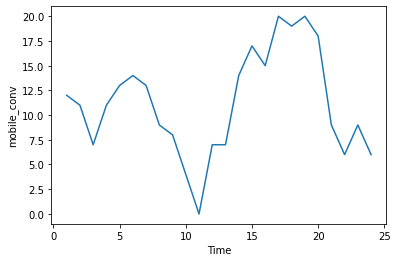

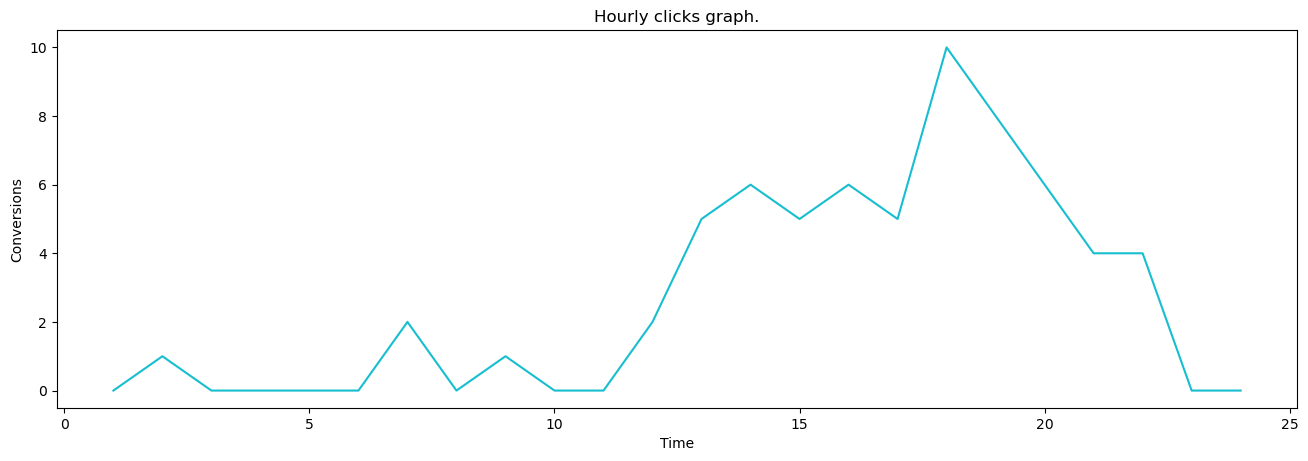

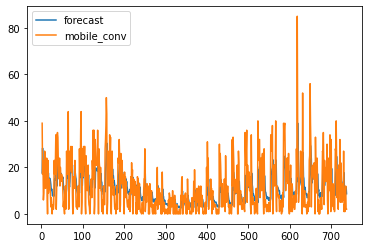

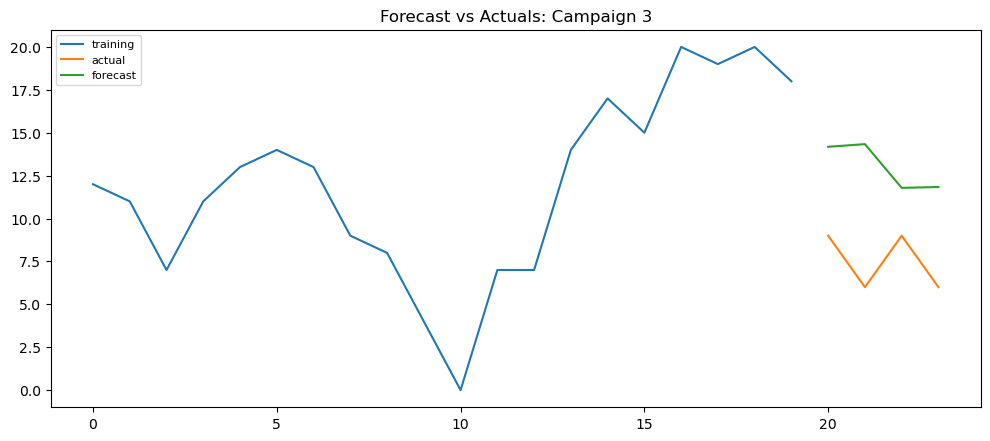

In [37]:
plot,grouped3=timing_analysis(df3)
plot_df(grouped3, x=grouped3.Time, y=grouped2.mobile_conv, title='Hourly clicks graph.')  
model_fit.plot_predict(dynamic=False)
plt.show()

train = grouped3.mobile_conv[:20]
test = grouped3.mobile_conv[20:]
# Build Model
model = ARIMA(train, order=(4, 2, 0)) 

fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(4, alpha=0)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals: Campaign 3')
plt.legend(loc='upper left', fontsize=8)
plt.show()